## **Import**

In [4]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Input, Embedding, Concatenate, TimeDistributed, Bidirectional, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from rouge import Rouge
import pydot
import csv

**file reading**

In [5]:
test_df = pd.read_csv("C:\\Users\\bansa\\OneDrive\\Desktop\\dl_lab_project\\test2000.csv")
train_df = pd.read_csv("C:\\Users\\bansa\\OneDrive\\Desktop\\dl_lab_project\\train_10000.csv")
valid_df = pd.read_csv("C:\\Users\\bansa\\OneDrive\\Desktop\\dl_lab_project\\validation1.csv")

In [6]:
train_df.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [7]:
train_df.drop('id', inplace=True, axis=1)
test_df.drop('id', inplace=True, axis=1)

In [8]:
valid_df.drop('id',inplace=True, axis=1)

In [9]:
train_df.head()

,article,highlights
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [10]:
#Add sostok and eostok at 
train_df['highlights'] = train_df['highlights'].apply(lambda x : 'sostok _start_  '+ x + ' _end_ eostok')

In [11]:
train_df.head()

,article,highlights
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"sostok _start_ Bishop John Folda, of North Da..."
1,(CNN) -- Ralph Mata was an internal affairs li...,sostok _start_ Criminal complaint: Cop used h...
2,A drunk driver who killed a young woman in a h...,"sostok _start_ Craig Eccleston-Todd, 27, had ..."
3,(CNN) -- With a breezy sweep of his pen Presid...,sostok _start_ Nina dos Santos says Europe mu...
4,Fleetwood are the only team still to have a 10...,sostok _start_ Fleetwood top of League One af...


In [12]:
test_df.head()

,article,highlights
0,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


In [13]:
print(train_df.shape)
print(test_df.shape)
print(valid_df.shape)

(10121, 2)
(1999, 2)
(6999, 2)


In [14]:
train_df.describe()

,article,highlights
count,10121,10121
unique,10118,10107
top,(CNN) -- For a world-class shopping experience...,sostok _start_ This page includes the show Tr...
freq,2,5


In [15]:
Article = train_df["article"]
Summary = train_df["highlights"]

In [16]:
len(Article[0])

1211

In [17]:
len_word_article = []
for i in range(len(Article)):
    len_word_article.append(len(Article[i].split()))

In [18]:
len_word_article[5]

334

## **Graph for words per article**

In [19]:
from cProfile import label
from tkinter import *
from tkinter.ttk import *

import matplotlib
matplotlib.use("TkAgg")
from matplotlib.figure import Figure 

# OO backend (Tkinter) tkagg() function:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

root = Tk()

figure = Figure(figsize=(20, 15), dpi=50)
plot = figure.add_subplot(1, 1, 1)

x = len_word_article
y = range(len(Article))
plot.plot(x, y, color="red", marker="o",  linestyle="--")

canvas = FigureCanvasTkAgg(figure, root)
canvas.get_tk_widget().grid(row=0, column=0)

root.mainloop()

In [20]:
def count_stopwords(text, stopwords):
    ''' Return the number of stopwords in the text
        Input:
            - text: string
            - stopwords: list of string, containing the stopwords
        Output:
            - int, number of stopwords in the text argument
    '''
    word_tokens = word_tokenize(text) #splitta i pezzi
    stopwords_x = [w for w in word_tokens if w in stopwords]
    
    return len(stopwords_x)

In [21]:
articles = []
for i in Article:
    articles.append(i)
summary = []
for j in Summary:
    summary.append(j)

In [22]:
articles[8]

"There are a number of job descriptions waiting for Darren Fletcher when he settles in at West Brom but the one he might not have expected is Saido Berahinoâ€™s nanny. Fletcherâ€™s unveiling as the deadline day signing from Manchester United was almost eclipsed by the 21-year-old striker, who is acquiring the habit of talking himself into trouble. Ten years Berahinoâ€™s senior, Fletcher will be expected to mentor a player who told the world this week that he wanted to play for a bigger club. Tony Pulis has advised Saido Berahino to focus on his performances at West Brom . Darren Fletcher has signed for the baggies where he will be asked to provide a role model for young players . That is off the pitch. On it, the Scotland midfielder wants to prove he is good enough to cut the mustard in the Premier League after finding starts harder and harder to come by at Old Trafford. Head coach Tony Pulis believes that Fletcher, who has agreed a three-and-a-half year contract, will be captain of Al

In [23]:
summary[8]

'sostok _start_  Tony Pulis believes Saido Berahino should look up to Darren Fletcher .\nPulis insists Berahino has been listened to the wrong advice .\nBerahino said he wants to move on to bigger things earlier in the week .\nREAD: Berahino available for Â£20m after Liverpool target angers club .\nCLICK HERE for all the latest West Brom news . _end_ eostok'

In [24]:
len_sentences = []
for i in range(len(articles)):
    len_sentences.append(len(articles[i]))

## **Graph for sentence per article**

In [25]:
from tkinter import *
from tkinter.ttk import * 
import matplotlib
from matplotlib import pyplot as plt
matplotlib.use("TkAgg")
from matplotlib.figure import Figure 

# OO backend (Tkinter) tkagg() function:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

root = Tk()

figure = Figure(figsize=(20, 15), dpi=50)
plot = figure.add_subplot(1, 1, 1)

x = len_sentences
y = range(len(articles))
plot.plot(x, y, color="blue", marker="o",  linestyle="--")

canvas = FigureCanvasTkAgg(figure, root)
canvas.get_tk_widget().grid(row=0, column=0)

root.mainloop()

**contractions**

In [26]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

## **Removing StopWords and cleaning of texts**

In [27]:
def clean_text(text, remove_stopwords=True):
    text = text.lower()
    text = text.split()
    tmp = []
    for word in text:
        if word in contractions:
            tmp.append(contractions[word])
        else:
            tmp.append(word)
    text = ' '.join(tmp)
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@€â™£\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\x9d', ' ', text)
    
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words('english'))
        text = [w for w in text if w not in stops]
        text = ' '.join(text)
        
    return text

In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

clean_summaries = []
for summary in train_df.highlights:
    clean_summaries.append(clean_text(summary, remove_stopwords=False))
print('Cleaning Summaries Complete')
    
clean_texts = []
for text in train_df.article:
    clean_texts.append(clean_text(text))
print('Cleaning Texts Complete')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bansa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaning Summaries Complete
Cleaning Texts Complete


In [29]:
clean_texts[0]

'associated press published 14 11 est 25 october 2013 updated 15 36 est 25 october 2013 bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late september early october state health department issued advisory exposure anyone attended five churches took communion bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis state immunization program manager molly howell says risk low officials feel important alert people possible exposure diocese announced monday bishop john folda taking time diagnosed hepatitis diocese says contracted infection contaminated food attending conference newly ordained bishops italy last month symptoms hepatitis include fever tiredness loss appetite nausea abdominal discomfort fargo catholic diocese north dakota pictured bishop located'

In [30]:
# sentences = []
# for sent in clean_texts:
#     sentences.append(sent.split("."))

In [31]:
# sentences[1]

In [32]:
# article_list = []
# for i in clean_texts:
#     article_list.append(i)
# print(article_list)

In [33]:
def Article_single(lst):
    res = []
    for el in lst:
        sub = el.split(', ')
        res.append(sub)
    return(res)
print(Article_single(clean_texts[0:2]))

[['associated press published 14 11 est 25 october 2013 updated 15 36 est 25 october 2013 bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late september early october state health department issued advisory exposure anyone attended five churches took communion bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis state immunization program manager molly howell says risk low officials feel important alert people possible exposure diocese announced monday bishop john folda taking time diagnosed hepatitis diocese says contracted infection contaminated food attending conference newly ordained bishops italy last month symptoms hepatitis include fever tiredness loss appetite nausea abdominal discomfort fargo catholic diocese north dakota pictured bishop located'], ['cnn ralph mata internal affairs lieutenant miami dade p

In [34]:
print(Article_single(clean_summaries[0:2]))

[['sostok  start  bishop john folda  of north dakota  is taking time off after being diagnosed   he contracted the infection through contaminated food in italy   church members in fargo  grand forks and jamestown could have been exposed    end  eostok'], ['sostok  start  criminal complaint  cop used his role to help cocaine traffickers   ralph mata  an internal affairs lieutenant  allegedly helped group get guns   he also arranged to pay two assassins in a murder plot  a complaint alleges    end  eostok']]


In [35]:
tokenized_words = []
for i in range(len(clean_texts)):
    nltk_tokens = nltk.word_tokenize(clean_texts[i])
    tokenized_words.append(nltk_tokens)
    # print (nltk_tokens)

In [36]:
print(tokenized_words[8])

['number', 'job', 'descriptions', 'waiting', 'darren', 'fletcher', 'settles', 'west', 'brom', 'one', 'might', 'expected', 'saido', 'berahino', 'nanny', 'fletcher', 'unveiling', 'deadline', 'day', 'signing', 'manchester', 'united', 'almost', 'eclipsed', '21', 'year', 'old', 'striker', 'acquiring', 'habit', 'talking', 'trouble', 'ten', 'years', 'berahino', 'senior', 'fletcher', 'expected', 'mentor', 'player', 'told', 'world', 'week', 'wanted', 'play', 'bigger', 'club', 'tony', 'pulis', 'advised', 'saido', 'berahino', 'focus', 'performances', 'west', 'brom', 'darren', 'fletcher', 'signed', 'baggies', 'asked', 'provide', 'role', 'model', 'young', 'players', 'pitch', 'scotland', 'midfielder', 'wants', 'prove', 'good', 'enough', 'cut', 'mustard', 'premier', 'league', 'finding', 'starts', 'harder', 'harder', 'come', 'old', 'trafford', 'head', 'coach', 'tony', 'pulis', 'believes', 'fletcher', 'agreed', 'three', 'half', 'year', 'contract', 'captain', 'albion', 'one', 'day', 'checked', 'sir', 'a

In [37]:
from nltk.corpus import stopwords  
english_stops = set(stopwords.words('english'))
from wordcloud import WordCloud
data = tokenized_words[0]

In [38]:
def wordcloud_draw(tokenized_words, color = 'black'):
    words = ' '.join(tokenized_words)
    # cleaned_word = " ".join([word for word in words.split()
    #                           if(word!='movie' and word!='film')
    #                         ])
    wordcloud = WordCloud(stopwords=english_stops,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


In [39]:
print("Positive words are as follows")
wordcloud_draw(data,'black')

Positive words are as follows


### **Train-Test-Split**

In [40]:
train_x, test_x, train_y, test_y = train_test_split(clean_texts, clean_summaries, test_size=0.2, random_state=0)

In [41]:
train_x[0]

'becky evans published 12 50 est 10 june 2013 updated 14 44 est 10 june 2013 jealous boyfriend today admitted stabbing mother three death christmas eve going pint pizza charmaine macmuiris 37 david sullivan 28 three weeks attacked jealous rage stabbed 10 times kitchen knife ms macmuiris found dead sullivan flat carmarthen west wales christmas day david sullivan sentenced life prison stabbing charmaine macmuiris death jealous rage went bought pizza beer mother three lay bleeding death today jailed life swansea crown court sentenced minimum term 14 years changing plea guilty moments due stand trial ms macmuiris mother christine said daughter taken cruellest ways cruellest days due wrap presents family persuaded meet bricklayer sullivan pair fought pub sullivan threw pint lager ms macmuiris ms macmuiris family said looking forward celebrating christmas three children hannah 20 ruby 15 keilan 12 toddler granddaughter pixie mother said victim impact statement charmaine robbed life much love

#### **Counting word Frequenicies**

In [42]:
t_tokenizer = Tokenizer()
t_tokenizer.fit_on_texts(list(train_x))

thresh = 4
count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key, value in t_tokenizer.word_counts.items():
    total_count += 1
    total_frequency += value
    if value < thresh:
        count += 1
        frequency += value

In [43]:
print('% of rare words in vocabulary: ', (count/total_count)*100.0)
print('Total Coverage of rare words: ', (frequency/total_frequency)*100.0)
t_max_features = total_count - count
print('Text Vocab: ', t_max_features)

% of rare words in vocabulary:  56.075718395629735
Total Coverage of rare words:  2.3658856696299453
Text Vocab:  39238


In [44]:
len(train_x)

8096

In [45]:
s_tokenizer = Tokenizer()
s_tokenizer.fit_on_texts(list(train_y))

thresh = 6
count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key, value in s_tokenizer.word_counts.items():
    total_count += 1
    total_frequency += value
    if value < thresh:
        count += 1
        frequency += value

In [46]:
print('% of rare words in vocabulary: ', (count/total_count)*100.0)
print('Total Coverage of rare words: ', (frequency/total_frequency)*100.0)
s_max_features = total_count-count
print('Summary Vocab: ', s_max_features)

% of rare words in vocabulary:  77.0792595489506
Total Coverage of rare words:  9.855213473255032
Summary Vocab:  7033


In [47]:
s_max_features

7033

In [48]:
maxlen_text = 785
maxlen_summ = 150

In [49]:
val_x = test_x
t_tokenizer = Tokenizer(num_words=t_max_features)
t_tokenizer.fit_on_texts(list(train_x))
train_x = t_tokenizer.texts_to_sequences(train_x)
val_x = t_tokenizer.texts_to_sequences(val_x)

train_x = pad_sequences(train_x, maxlen=maxlen_text, padding='post')
val_x = pad_sequences(val_x, maxlen=maxlen_text, padding='post')

In [50]:
val_y = test_y
s_tokenizer = Tokenizer(num_words=s_max_features)
s_tokenizer.fit_on_texts(list(train_y))
train_y = s_tokenizer.texts_to_sequences(train_y)
val_y = s_tokenizer.texts_to_sequences(val_y)

train_y = pad_sequences(train_y, maxlen=maxlen_summ, padding='post')
val_y = pad_sequences(val_y, maxlen=maxlen_summ, padding='post')

In [51]:
print("Training Sequence", train_x.shape)
print('Target Values Shape', train_y.shape)
print('Test Sequence', val_x.shape)
print('Target Test Shape', val_y.shape)

Training Sequence (8096, 785)
Target Values Shape (8096, 150)
Test Sequence (2025, 785)
Target Test Shape (2025, 150)


**Pretrained-Embedding**

In [52]:
embeding_index = {}
embed_dim = 100
with open("C:\\Users\\bansa\\OneDrive\\Desktop\\dl_lab_project\\glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeding_index[word] = coefs

In [53]:
t_embed = np.zeros((t_max_features, embed_dim))
for word, i in t_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < t_max_features and vec is not None:
        t_embed[i] = vec

In [54]:
s_embed = np.zeros((s_max_features, embed_dim))
for word, i in s_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < s_max_features and vec is not None:
        s_embed[i] = vec

## **Model**

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 785)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 785, 100)     3923800     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 bidirectional (Bidirectional)  [(None, 256),        234496      ['embedding[0][0]']              
                                 (None, 128),                                                 

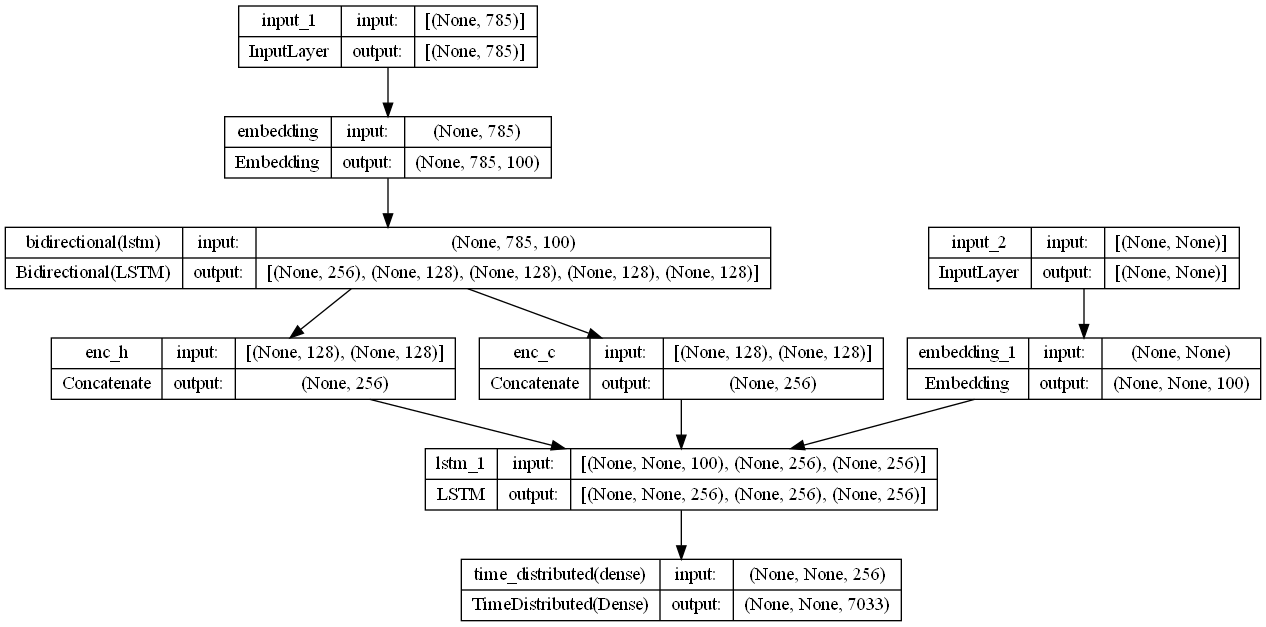

In [55]:
latent_dim = 128
# Encoder
enc_input = Input(shape=(maxlen_text, ))
enc_embed = Embedding(t_max_features, embed_dim, input_length=maxlen_text, weights=[t_embed], trainable=False)(enc_input)
# h_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
# h_out, _, _ = h_lstm(enc_embed)
enc_lstm = Bidirectional(LSTM(latent_dim, return_state=True))
enc_output, enc_fh, enc_fc, enc_bh, enc_bc = enc_lstm(enc_embed)
enc_h = Concatenate(axis=-1, name='enc_h')([enc_fh, enc_bh])
enc_c = Concatenate(axis=-1, name='enc_c')([enc_fc, enc_bc])
#Decoder
dec_input = Input(shape=(None, ))
dec_embed = Embedding(s_max_features, embed_dim, weights=[s_embed], trainable=False)(dec_input)
dec_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
dec_outputs, _, _ = dec_lstm(dec_embed, initial_state=[enc_h, enc_c])

dec_dense = TimeDistributed(Dense(s_max_features, activation='softmax'))
dec_output = dec_dense(dec_outputs)

model = Model([enc_input, dec_input], dec_output)
model.summary()

plot_model(
    model,
    to_file='./seq2seq_encoder_decoder.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96)

In [56]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop')
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [57]:
# model.fit([train_x, train_y[:, :-1]], train_y.reshape(train_y.shape[0], train_y.shape[1], 1)[:, 1:], epochs=20, callbacks=[early_stop], batch_size=64, verbose=2, validation_data=([val_x, val_y[:, :-1]], val_y.reshape(val_y.shape[0], val_y.shape[1], 1)[:, 1:]),steps_per_epoch=60)

In [58]:
model.fit([train_x, train_y], train_y.reshape(train_y.shape[0], train_y.shape[1], 1), epochs=20, callbacks=[early_stop], batch_size=64, verbose=1, validation_data=([val_x, val_y], val_y.reshape(val_y.shape[0], val_y.shape[1], 1)),steps_per_epoch=60)

Epoch 1/20
60/60 [==============================] - 94s 1s/step - loss: 2.7339 - val_loss: 1.9668
Epoch 2/20
60/60 [==============================] - 81s 1s/step - loss: 1.8431 - val_loss: 1.5289
Epoch 3/20
60/60 [==============================] - 80s 1s/step - loss: 1.4081 - val_loss: 1.1174
Epoch 4/20
60/60 [==============================] - 82s 1s/step - loss: 1.0575 - val_loss: 0.8066
Epoch 5/20
60/60 [==============================] - 81s 1s/step - loss: 0.8039 - val_loss: 0.5862
Epoch 6/20
60/60 [==============================] - 81s 1s/step - loss: 0.6114 - val_loss: 0.4293
Epoch 7/20
60/60 [==============================] - 82s 1s/step - loss: 0.4736 - val_loss: 0.3206
Epoch 8/20
60/60 [==============================] - 82s 1s/step - loss: 0.3717 - val_loss: 0.2399
Epoch 9/20
60/60 [==============================] - 82s 1s/step - loss: 0.2900 - val_loss: 0.1804
Epoch 10/20
60/60 [==============================] - 82s 1s/step - loss: 0.2318 - val_loss: 0.1356
Epoch 11/20
60/60 [

In [ ]:
load = model.save("keshav.h5")

INFO:tensorflow:Assets written to: keshav\assets


INFO:tensorflow:Assets written to: keshav\assets


In [ ]:
enc_model = Model(inputs=enc_input, outputs=[enc_h, enc_c])

dec_init_state_h = Input(shape=(latent_dim*2, ))
dec_init_state_c = Input(shape=(latent_dim*2, ))

dec_out, dec_h, dec_c = dec_lstm(dec_embed, initial_state=[dec_init_state_h, dec_init_state_c])
dec_final = dec_dense(dec_out)

dec_model = Model([dec_input]+[dec_init_state_h, dec_init_state_c], [dec_final]+[dec_h, dec_c])

In [ ]:
def generate_summary(input_seq):
    h, c = enc_model.predict(input_seq)
    
    next_token = np.zeros((1, 1))
    next_token[0, 0] = s_tokenizer.word_index['sostok']
    output_seq = ''
    
    stop = False
    count = 0
    
    while not stop:
        if count > 100:
            break
        decoder_out, state_h, state_c = dec_model.predict([next_token]+[h, c])
        token_idx = np.argmax(decoder_out[0, -1, :])
        
        if token_idx == s_tokenizer.word_index['eostok']:
            stop = True
        elif token_idx > 0 and token_idx != s_tokenizer.word_index['sostok']:
            token = s_tokenizer.index_word[token_idx]
            output_seq = output_seq + ' ' + token
        
        next_token = np.zeros((1, 1))
        next_token[0, 0] = token_idx
        h, c = state_h, state_c
        count += 1
        
    return output_seq

In [ ]:
generate_summary('becky evans published 12 50 est 10 june 2013 updated 14 44 est 10 june 2013 jealous boyfriend today admitted stabbing mother three death christmas eve going pint pizza charmaine macmuiris 37 david sullivan 28 three weeks attacked jealous rage stabbed 10 times kitchen knife ms macmuiris found dead sullivan flat carmarthen west wales christmas day david sullivan sentenced life prison stabbing charmaine macmuiris death jealous rage went bought pizza beer mother three lay bleeding death today jailed life swansea crown court sentenced minimum term 14 years changing plea guilty moments due stand trial ms macmuiris mother christine said daughter taken cruellest ways cruellest days due wrap presents family persuaded meet bricklayer sullivan pair fought pub sullivan threw pint lager ms macmuiris ms macmuiris family said looking forward celebrating christmas three children hannah 20 ruby 15 keilan 12 toddler granddaughter pixie mother said victim impact statement charmaine robbed life much loved mother daughter sister auntie devastated loss shocking manner death patrick harrington qc said brutal attack sullivan went buy alcohol food said left home went two pubs drank larger bought pizza returned address murder ate pizza ms macmuiris discovered sullivan home maes yr ysgol carmarthen christmas day parents arrived christmas day police called court heard sullivan mistakenly believed girlfriend seeing another man sent threatening text messages man family night murder persuaded mother three come back flat murdering police officers came house hearing reports disturbance sullivan told everything ok sullivan confronted police officers charmaine lay bleeding death house mr harrington qc told court police officers asked cuts arm said punched hole wall little later seen standing outside home neighbours said girlfriend argued hit lying bed merely hit stabbed death prosecutors said punched ms macmuiris face lounge stabbing death bedroom charmaine macmuiris family said taken cruellest ways cruellest days mr harrington qc said even time showed possessive jealous towards ms macmuiris family said 14 year sentence long enough said statement family would like thank friends neighbours dyfed powys police help support provided throughout difficult time glad sullivan sentenced spared trial however feel minimum term 14 years reflects severity done still devastated losing charmaine judge eleri rees told harrington sentencing vicious brutal killing may one assault physical evidence struggle blood stains variety locations used kitchen knife attack charmaine death would instantaneous result one wound blow point daughter tried text mother tried respond clumsy mistake sent text another person callous behaviour show someone purported love speaking case ed beltrami chief crown prosecutor crown prosecution service wales said david sullivan finally admitted responsibility senseless brutal assault led tragic death charmaine macmuiris sullivan truly know caused carry vicious attack entirely innocent victim certain close charmaine continue deal truly awful consequences')

In [59]:
test_inputs = [clean_text(sent) for sent in test_df.article[:1]]
test_inputs = t_tokenizer.texts_to_sequences(list(test_inputs))
test_inputs = pad_sequences(test_inputs, maxlen=maxlen_text, padding='post')

In [60]:
x = test_inputs.transpose()

In [61]:
# maxlen_text

In [62]:
# test_inputs

In [63]:
import csv
hyps = []
with open('./result.csv', 'w', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Article', 'Original Summary', 'Model Output'])
    for i in range(500):
        our_summ = generate_summary(x.reshape(1, maxlen_text))
        print(our_summ)
        hyps.append(our_summ)
        writer.writerow([test_df.article[i], test_df.highlights[i], our_summ])

1/1 [==============================] - 0s 16ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 16ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 15ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 20ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 20ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 22ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 18ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 19ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 17ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 22ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 18ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 21ms/step
 sportsmail sportsmail
1/1 [==============================] - 0s 20ms/step
 sportsmail sportsmail
1/1 [====================

In [65]:
with open("file.txt", 'w') as f:
    for s in hyps:
        f.write(str(s) + '\n')

with open("file.txt", 'r') as f:
    saved_hyps = [line.rstrip('\n') for line in f]


print(saved_hyps)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

#### **Rouge Score**

In [ ]:
saved_hyps[1]

In [ ]:
hyps = ["Remington 'Remi' Walden, four, was killed three years ago when his family's Jeep Grand Cherokee exploded when it was rear-ended .Jurors in Georgia ruled that Chrysler acted with reckless disregard for human life .Jeep Grand CherokeeÂ exploded when it was rear-ended, causing the gas tank to ignite .",
"The home side were gifted the lead after James Collins sliced a cross over Adrian for an astonishing own goal .A devastating counter-attacking goal was swept in by Sergio Aguero for his 20th league goal of the season .The victory moved Manuel Pellegrini's side back to within one point of Manchester United in third in the league .CLICK HERE for the player ratings from the Etihad Stadium after Jesus Navas steals the show ."
]

In [ ]:
rouge = Rouge()
rouge.get_scores(hyps, test_df.highlights, avg=True, ignore_empty=True)

{'rouge-1': {'r': 0.059269162210338684,
  'p': 0.039136302294197026,
  'f': 0.04685591703298651},
 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
 'rouge-l': {'r': 0.059269162210338684,
  'p': 0.039136302294197026,
  'f': 0.04685591703298651}}